# Estandarización y blanqueado de datos

Sea $\mathbf{X}\in\mathbb{R}^{N\times D}$ una matriz de $N$ datos $D$-dimensionales. 

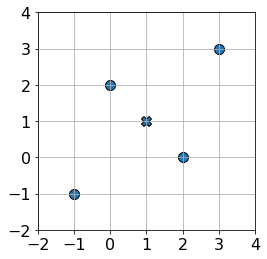

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
fig, ax = plt.subplots(); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100);

## Estandarización

**Estandarización:** $\quad\operatorname{standardize}(\mathbf{X})=(\mathbf{X}-\boldsymbol{1}_N\boldsymbol{\mu}^t)\operatorname{diag}(\boldsymbol{\sigma})^{-1}\qquad\boldsymbol{\mu}=\bar{\boldsymbol{x}}$ y $\boldsymbol{\sigma}$ son la media y desviación típica empíricas

**Ventaja:** $\;$ facilita la homogeneización de variables heterogéneas; las variables estandarizadas tienen media nula y varianza unitaria

**Incoveniente:** $\;$ no elimina correlaciones entre variables

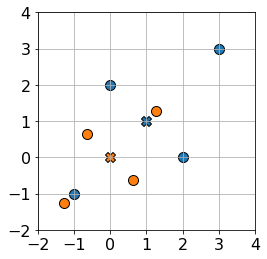

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0); sigma = np.std(X, axis=0)
Xstd = (X - m) / sigma
fig, ax = plt.subplots(); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100)
plt.scatter(0, 0, facecolor='C1', edgecolor='k', s=100, marker="X")
plt.scatter(Xstd[:,0], Xstd[:,1], facecolor='C1', edgecolor='k', s=100);

## Blanqueado PCA

**Blanqueado principal component analysis (PCA):** $\;$ dada $\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t,\,$ descomposición propia de la matriz de covarianzas empírica:
$$\quad\operatorname{whitening}(\mathbf{X})=(\mathbf{X}-\mathbf{1}_N\boldsymbol{\mu}^t)\mathbf{W}_{\text{pca}}^t%
\quad\text{con}\quad%
\mathbf{W}_{\text{pca}}=\boldsymbol{\Lambda}^{-1/2}\mathbf{U}^t$$
Los datos blanqueados exhiben media nula y matriz de covarianzas blanca (identidad): $\;\boldsymbol{y}=\mathbf{W}_{\text{pca}}(\boldsymbol{x}-\boldsymbol{\mu})$
$$\begin{align*}
\mathbb{E}[\mathbf{W}_{\text{pca}}(\boldsymbol{x}-\boldsymbol{\mu})]%
&=\mathbf{W}_{\text{pca}}\mathbb{E}[\boldsymbol{x}-\boldsymbol{\mu}]=\boldsymbol{0}\\%
\operatorname{Cov}[\mathbf{W}_{\text{pca}}(\boldsymbol{x}-\boldsymbol{\mu})]%
&=\mathbf{W}_{\text{pca}}\operatorname{Cov}[\boldsymbol{x}]\mathbf{W}_{\text{pca}}^t%
=\boldsymbol{\Lambda}^{-1/2}\mathbf{U}^t\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t\mathbf{U}\boldsymbol{\Lambda}^{-1/2}%
=\boldsymbol{\Lambda}^{-1/2}\boldsymbol{\Lambda}\boldsymbol{\Lambda}^{-1/2}%
=\boldsymbol{\Lambda}^0=\mathbf{I}
\end{align*}$$



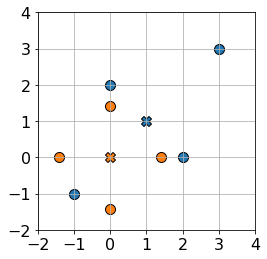

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
W = np.sqrt(np.linalg.inv(np.diag(La))) @ U.T
Xw = (X - m) @ W.T
fig, ax = plt.subplots(); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100)
plt.scatter(0, 0, facecolor='C1', edgecolor='k', s=100, marker="X")
plt.scatter(Xw[:,0], Xw[:,1], facecolor='C1', edgecolor='k', s=100);

## Blanqueado ZCA

**Blanqueado zero-phase component analysis (ZCA):** $\;$ invierte la transformación ortogonal aplicada por PCA para que los datos blanqueados se hallen próximos a los originales (en mínimos cuadrados) y se "parezcan" (p.e. con imágenes)
$$\quad\operatorname{whitening}(\mathbf{X})=(\mathbf{X}-\mathbf{1}_N\boldsymbol{\mu}^t)\mathbf{W}_{\text{zca}}^t%
\quad\text{con}\quad%
\mathbf{W}_{\text{zca}}=\mathbf{U}\mathbf{W}_{\text{pca}}=\mathbf{U}\boldsymbol{\Lambda}^{-1/2}\mathbf{U}^t$$
Los datos blanqueados exhiben media nula y matriz de covarianzas blanca (identidad): $\;\boldsymbol{y}=\mathbf{W}_{\text{zca}}(\boldsymbol{x}-\boldsymbol{\mu})$
$$\begin{align*}
\mathbb{E}[\mathbf{W}_{\text{zca}}(\boldsymbol{x}-\boldsymbol{\mu})]%
&=\mathbf{U}\mathbb{E}[\mathbf{W}_{\text{pca}}(\boldsymbol{x}-\boldsymbol{\mu})]=\boldsymbol{0}\\%
\operatorname{Cov}[\mathbf{W}_{\text{zca}}(\boldsymbol{x}-\boldsymbol{\mu})]%
&=\mathbf{U}\operatorname{Cov}[\mathbf{W}_{\text{pca}}(\boldsymbol{x}-\boldsymbol{\mu})]\mathbf{U}^t%
=\mathbf{U}\mathbf{I}\mathbf{U}^t=\mathbf{I}%
\end{align*}$$

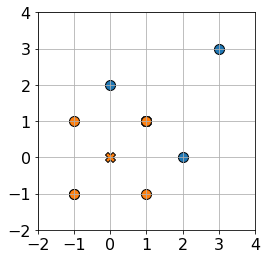

In [4]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
W = U @ np.sqrt(np.linalg.inv(np.diag(La))) @ U.T
Xw = (X - m) @ W.T
fig, ax = plt.subplots(); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100)
plt.scatter(0, 0, facecolor='C1', edgecolor='k', s=100, marker="X")
plt.scatter(Xw[:,0], Xw[:,1], facecolor='C1', edgecolor='k', s=100);